# Noise Model Diagnostics: Autocorrelation of the Residuals

This example shows how to use the autocorrelation plots of the residuals to check assumptions of the noise model

Three cases are shown. In the first two, optimization is used to obtain a best-fit parameter vector in a single output problem. In the first case the noise is correctly specified and in the second case the noise is misspecified. The third case demonstrates the same method in a multiple output problem with Bayesian inference.

## Case 1: Correctly specified noise

For the first example, we will use optimization to obtain the best-fit parameter vector. See [Optimization First Example](https://github.com/pints-team/pints/blob/master/examples/optimisation-first-example.ipynb) for more details. We begin with a problem in which the noise is correctly specified: both the data generation and the model use independent Gaussian noise.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
noise = 50
values = org_values + np.random.normal(0, noise, org_values.shape)

# Set up the problem and run the optimization 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      7155111    0:00.0
1     12     4289033    0:00.0
2     18     4289033    0:00.0
3     24     4289033    0:00.0
20    126    1052759    0:00.0
40    246    274915.3   0:00.0
60    366    274715.7   0:00.0
80    486    274710.3   0:00.0
100   606    274710.2   0:00.0
120   726    274710.2   0:00.1
140   846    274710.2   0:00.1
160   966    274710.2   0:00.1
180   1086   274710.2   0:00.1
200   1206   274710.2   0:00.1
220   1326   274710.2   0:00.1
240   1446   274710.2   0:00.1
260   1566   274710.2   0:00.1
280   1686   274710.2   0:00.1
300   1806   274710.2   0:00.1
320   1926   274710.2   0:00.2
340   2046   274710.2   0:00.2
360   2166   274710.2   0:00.2
380   2286   274710.2   0:00.2
393   2358   274710.2   0:00.2
Halting: No significant change for 200 iterations.
Score at true solution: 
277184.6744236935
Found s

### Visualization of the data
After obtaining these parameters, it is useful to visualize the data and the fit.

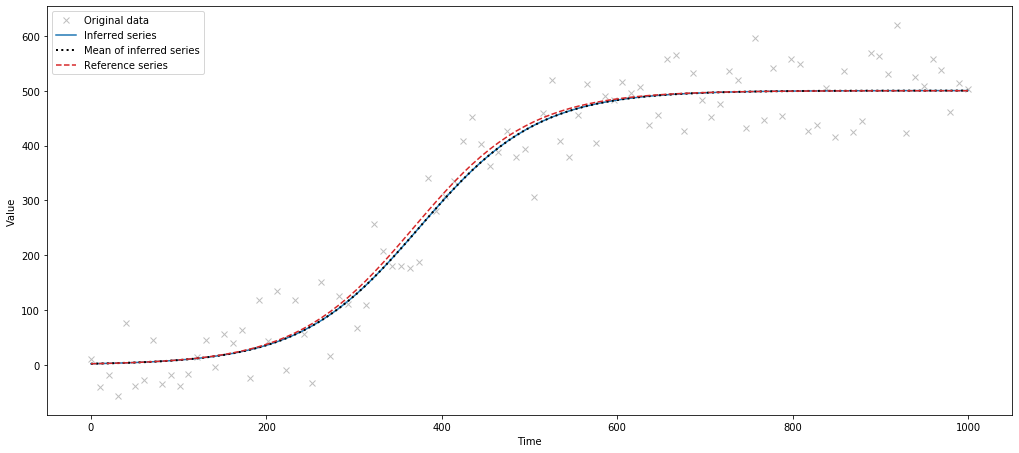

In [2]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

### Plotting autocorrelation of the residuals
Next we use the autocorrelation plot of the residuals to evaluate the noise model. This functionality is provided by the `plot_residuals_autocorrelation` method in `pints.residuals_diagnostics`.

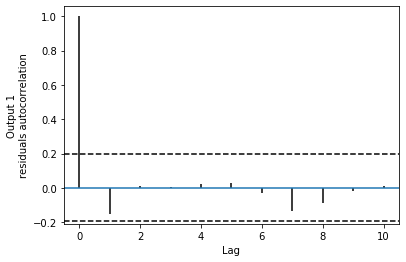

In [3]:
from pints.residuals_diagnostics import plot_residuals_autocorrelation

# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem,
                                     show_confidence=True)

plt.show()


The figure shows no significant autocorrelation in the residuals. Therefore, the assumption of independent noise may be valid.

## Case 2: Incorrectly specified noise

For the next case, we generate data with an AR(1) (first order autoregressive) noise model. However, we deliberately misspecify the model and assume independent Gaussian noise (as before) when fitting the parameters.

In [4]:
import pints.noise

# Use the toy logistic model
model = toy.LogisticModel()

real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100)
org_values = model.simulate(real_parameters, times)

# Add AR(1) noise
rho = 0.75
sigma = 50
values = org_values + pints.noise.ar1(rho, sigma, len(org_values))

# Set up the problem and run the optimization 
problem = pints.SingleOutputProblem(model, times, values)

score = pints.SumOfSquaresError(problem)
boundaries = pints.RectangularBoundaries([0, 200], [1, 1000])
x0 = np.array([0.5, 500])

found_parameters, found_value = pints.optimise(
    score,
    x0,
    boundaries=boundaries,
    method=pints.XNES,
    )

print('Score at true solution: ')
print(score(real_parameters))

print('Found solution:          True parameters:' )
for k, x in enumerate(found_parameters):
    print(pints.strfloat(x) + '    ' + pints.strfloat(real_parameters[k]))

Minimising error measure
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      4830452    0:00.0
1     12     4830452    0:00.0
2     18     4830452    0:00.0
3     24     4830452    0:00.0
20    126    594725.1   0:00.0
40    246    312542.1   0:00.0
60    366    248924.8   0:00.0
80    486    248923.2   0:00.0
100   606    248923.2   0:00.1
120   726    248923.2   0:00.1
140   846    248923.2   0:00.1
160   966    248923.2   0:00.1
180   1086   248923.2   0:00.1
200   1206   248923.2   0:00.1
220   1326   248923.2   0:00.1
240   1446   248923.2   0:00.1
260   1566   248923.2   0:00.1
280   1686   248923.2   0:00.1
300   1806   248923.2   0:00.1
320   1926   248923.2   0:00.2
340   2046   248923.2   0:00.2
358   2148   248923.2   0:00.2
Halting: No significant change for 200 iterations.
Score at true solution: 
253482.53710519863
Found solution:          True parameters:
 1.46275523656929085e-02  

### Visualization of the data
As before we plot the data and the inferred trajectory.

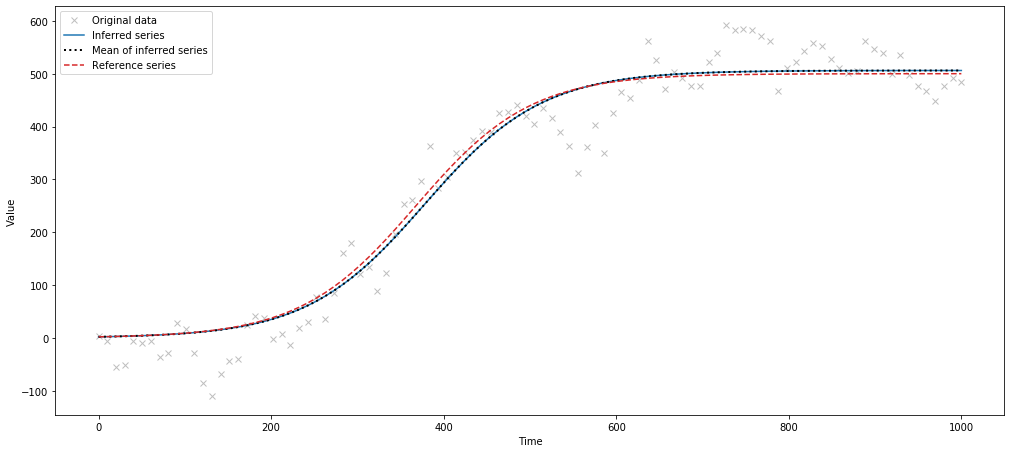

In [5]:
fig, ax = pints.plot.series(np.array([found_parameters]), problem, ref_parameters=real_parameters)
fig.set_size_inches(15, 7.5)
plt.show()

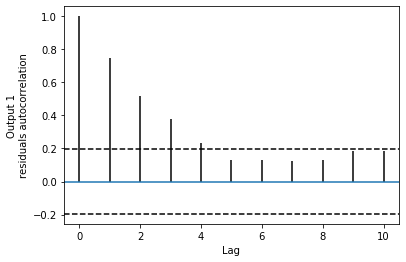

In [6]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(np.array([found_parameters]),
                                     problem,
                                     show_confidence=True)

plt.show()

Now the autocorrelation plot of the residuals shows high autocorrelation at small lags, which is typical of AR(1) noise. Therefore, this visualization suggests that the assumption of independent Gaussian noise which we made during inference is invalid.

## Case 3: Multiple output Bayesian inference problem 

The `plot_residuals_autocorrelation` function also works with Bayesian inference and multiple output problems. For the final example, we demonstrate the same strategy in this setting.

For this example, the Lotka-Volterra model is used. See the [Lotka-Volterra example](https://github.com/pints-team/pints/blob/master/examples/toy-model-lotka-volterra.ipynb) for more details. As in Case 1, the true data is generated with independent Gaussian noise.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pints
import pints.toy

model = pints.toy.LotkaVolterraModel()

times = np.linspace(0, 3, 100)
parameters = model.suggested_parameters()
model.set_initial_conditions([2, 2])
org_values = model.simulate(parameters, times)

# Add noise
sigma = 0.05
values = org_values + np.random.normal(0, sigma, org_values.shape)

# Create an object with links to the model and time series
problem = pints.MultiOutputProblem(model, times, values)

# Create a log posterior
log_prior = pints.UniformLogPrior([1, 1, 1, 1, 0, 0], [6, 6, 6, 6, 1, 1])
log_likelihood = pints.GaussianLogLikelihood(problem)
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Run MCMC on the noisy data
x0 = [[4, 1, 2, 3, .1, .1]]*3
mcmc = pints.MCMCController(log_posterior, 3, x0)
mcmc.set_max_iterations(4000)

print('Running')
chains = mcmc.run()
print('Done!')

Running
Using Haario-Bardenet adaptive covariance MCMC
Generating 3 chains.
Running in sequential mode.
Iter. Eval. Accept.   Accept.   Accept.   Time m:s
0     3      0         0         0          0:00.0
1     6      0         0.5       0.5        0:00.0
2     9      0         0.333     0.667      0:00.0
3     12     0.25      0.5       0.5        0:00.0
20    63     0.429     0.571     0.571      0:00.1
40    123    0.39      0.537     0.512      0:00.1
60    183    0.393     0.393     0.459      0:00.2
80    243    0.42      0.308642  0.395      0:00.2
100   303    0.426     0.248     0.327      0:00.3
120   363    0.397     0.231405  0.281      0:00.4
140   423    0.383     0.206     0.241      0:00.4
160   483    0.366     0.193     0.211      0:00.5
180   543    0.337     0.182     0.193      0:00.5
Initial phase completed.
200   603    0.343     0.169     0.174      0:00.6
220   663    0.321267  0.181     0.176      0:00.7
240   723    0.328     0.195     0.195      0:00.7
260 

3160  9483   0.236634  0.22      0.224      0:09.1
3180  9543   0.236718  0.219     0.223      0:09.1
3200  9603   0.237     0.22      0.224      0:09.2
3220  9663   0.237     0.222     0.226      0:09.2
3240  9723   0.236     0.222     0.227      0:09.3
3260  9783   0.236     0.223     0.226      0:09.3
3280  9843   0.237     0.224     0.226      0:09.4
3300  9903   0.237     0.223     0.226598   0:09.5
3320  9963   0.237     0.223     0.226      0:09.5
3340  10023  0.237     0.222     0.227      0:09.6
3360  10083  0.238     0.223     0.226      0:09.6
3380  10143  0.238     0.222     0.226      0:09.7
3400  10203  0.237     0.222     0.226404   0:09.7
3420  10263  0.237     0.221865  0.227      0:09.8
3440  10323  0.237     0.223     0.227      0:09.9
3460  10383  0.238     0.223     0.226      0:09.9
3480  10443  0.238     0.222     0.224      0:10.0
3500  10503  0.237     0.223     0.225      0:10.0
3520  10563  0.238     0.223232  0.224      0:10.1
3540  10623  0.237     0.223   

### Visualization of the data
As before we plot the data and the inferred trajectories.

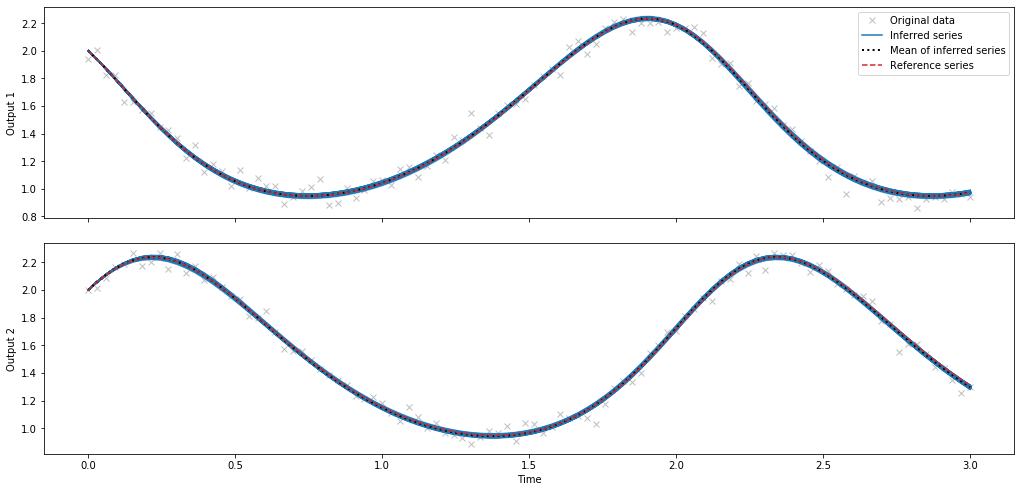

In [8]:
# Get the first MCMC chain
chain1 = chains[0]

# Cut off the burn-in samples
chain1 = chain1[2500:]

fig, ax = pints.plot.series(chain1, problem, ref_parameters=parameters)
fig.set_size_inches(15, 7.5)
plt.show()

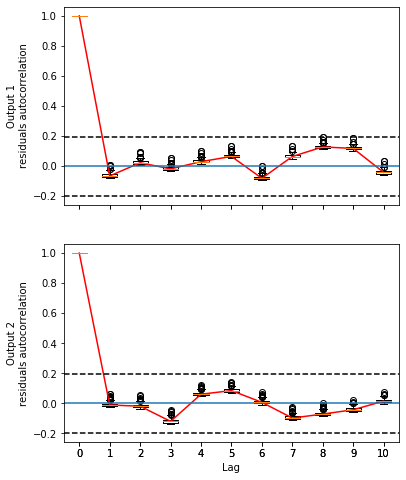

In [9]:
# Plot the autocorrelation
fig = plot_residuals_autocorrelation(chain1,
                                     problem,
                                     show_confidence=True)

plt.show()

The `plot_residuals_autocorrelation` function generates one residuals plot for each output. Additionally, since Bayesian inference was performed and an MCMC chain was provided to the function, it generates a box-plot of the autocorrelation at each lag. Each box-plot indicates the distribution of autocorrelations over the MCMC samples.

In both outputs, no significant autocorrelation in the residuals is seen, as expected since independent Gaussian noise was used to generate the data.